<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/mid_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 42.8 MB/s eta 0:00:00


In [2]:
# 필요한 패키지 설치
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 외상 데이터

In [3]:
# 외상 데이터 불러오기
df1 = pd.read_csv('/content/외상관련.csv')
df1.head()

,외상여부,주문일시,처리일시,외상납입일,사입처리사입자,도매빌딩,도매층,도매매장호수,소매매장명
0,완료,2023.4.2 22:18,2023.4.3 3:11,2023.4.4 3:42,E230,C5,B1F,라5,A295
1,완료,2023.2.12 22:58,2023.2.13 3:41,2023.2.14 4:01,E230,C5,B1F,가21,A584
2,완료,2023.2.19 14:22,2023.2.20 3:26,2023.2.21 4:21,E230,C5,B1F,가21,A584
3,완료,2022.12.18 22:33,2022.12.19 3:20,2022.12.19 21:00,E400,C5,B1F,다6,A131
4,완료,2022.9.28 0:48,2022.9.28 4:46,2022.9.29 2:05,E142,C5,1F,라35,A111


In [4]:
df1.shape

(4204, 9)

In [5]:
# 각 컬럼의 속성 및 결측값 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   외상여부     4204 non-null   object
 1   주문일시     4204 non-null   object
 2   처리일시     4204 non-null   object
 3   외상납입일    4198 non-null   object
 4   사입처리사입자  4204 non-null   object
 5   도매빌딩     4204 non-null   object
 6   도매층      4204 non-null   object
 7   도매매장호수   4204 non-null   object
 8   소매매장명    4204 non-null   object
dtypes: object(9)
memory usage: 295.7+ KB


### 필요한 컬럼 선택
- 외상여부
- 주문일시
- 처리일시
- 외상납입일
- 사입처리사입자

In [6]:
df1 = df1.iloc[:, 0:5]
df1.head()

,외상여부,주문일시,처리일시,외상납입일,사입처리사입자
0,완료,2023.4.2 22:18,2023.4.3 3:11,2023.4.4 3:42,E230
1,완료,2023.2.12 22:58,2023.2.13 3:41,2023.2.14 4:01,E230
2,완료,2023.2.19 14:22,2023.2.20 3:26,2023.2.21 4:21,E230
3,완료,2022.12.18 22:33,2022.12.19 3:20,2022.12.19 21:00,E400
4,완료,2022.9.28 0:48,2022.9.28 4:46,2022.9.29 2:05,E142


### 결측값 처리

In [7]:
df1.isnull().sum() # 외상 미완료 6건

외상여부       0
주문일시       0
처리일시       0
외상납입일      6
사입처리사입자    0
dtype: int64

In [8]:
df1[df1['외상납입일'].isnull()]
# df1[df1['외상여부']=='외상']

,외상여부,주문일시,처리일시,외상납입일,사입처리사입자
14,외상,2023.4.17 23:45,2023.4.17 23:45,NaN,E988
80,외상,2023.2.16 22:25,2023.2.17 2:36,NaN,E400
263,외상,2023.4.16 21:53,2023.4.17 1:58,NaN,E972
3182,외상,2023.4.17 0:28,2023.4.17 4:09,NaN,E770
4199,외상,2022.10.18 0:37,2022.10.18 2:19,NaN,E6
4200,외상,2023.3.31 4:14,2023.3.31 4:15,NaN,E477


In [9]:
# 외상납입일 컬럼이 결측값인 행 제거
df1 = df1.dropna(subset=['외상납입일'])
df1.isnull().sum()

외상여부       0
주문일시       0
처리일시       0
외상납입일      0
사입처리사입자    0
dtype: int64

### 데이터 계산 및 그룹화

In [10]:
# datetime 형식으로 변환
df1['주문일시'] = pd.to_datetime(df1['주문일시'], format='%Y.%m.%d %H:%M')
df1['처리일시'] = pd.to_datetime(df1['처리일시'], format='%Y.%m.%d %H:%M')
df1['외상납입일'] = pd.to_datetime(df1['외상납입일'], format='%Y.%m.%d %H:%M')

1. 처리시간 = 외상납입일 - 처리일시

    > 처리시간 그룹 : 1일 이하, 1일, 2일, …, 6일 이상

In [11]:
# 외상 거래의 처리 시간 계산
df1['처리시간'] = df1['외상납입일'] - df1['처리일시']
df1.head()

,외상여부,주문일시,처리일시,외상납입일,사입처리사입자,처리시간
0,완료,2023-04-02 22:18:00,2023-04-03 03:11:00,2023-04-04 03:42:00,E230,1 days 00:31:00
1,완료,2023-02-12 22:58:00,2023-02-13 03:41:00,2023-02-14 04:01:00,E230,1 days 00:20:00
2,완료,2023-02-19 14:22:00,2023-02-20 03:26:00,2023-02-21 04:21:00,E230,1 days 00:55:00
3,완료,2022-12-18 22:33:00,2022-12-19 03:20:00,2022-12-19 21:00:00,E400,0 days 17:40:00
4,완료,2022-09-28 00:48:00,2022-09-28 04:46:00,2022-09-29 02:05:00,E142,0 days 21:19:00


In [12]:
# 처리시간을 그룹화하여 숫자로 표현
df1['처리시간_그룹'] = df1['처리시간'].apply(
    lambda x: 0 if x.total_seconds() <= 24 * 60 * 60 else x.days)

# 인덱스 이름 변경
df1['처리시간_그룹'].replace({0: '1일 이하', 1: '1일', 2: '2일', 3: '3일',
                           4: '4일', 5: '5일', 6: '6일 이상'}, inplace=True)

# 그룹별 건수 확인
df1.groupby('처리시간_그룹').size()

처리시간_그룹
1일       1017
1일 이하    2529
2일        460
3일        176
4일          5
5일          9
6일 이상       2
dtype: int64

2. 거래횟수
- 사입처리사입자 별 누적 거래 횟수

In [13]:
# 데이터 정렬
df1 = df1.sort_values('주문일시')
df1.head()

,외상여부,주문일시,처리일시,외상납입일,사입처리사입자,처리시간,처리시간_그룹
1802,완료,2022-05-31 15:49:00,2022-06-01 02:18:00,2022-06-01 23:51:00,E230,0 days 21:33:00,1일 이하
2085,완료,2022-05-31 15:54:00,2022-06-01 00:19:00,2022-06-02 00:17:00,E230,0 days 23:58:00,1일 이하
1598,완료,2022-05-31 16:34:00,2022-05-31 23:49:00,2022-06-01 23:58:00,E230,1 days 00:09:00,1일
1901,완료,2022-05-31 16:39:00,2022-05-31 23:49:00,2022-06-01 23:58:00,E230,1 days 00:09:00,1일
2349,완료,2022-05-31 21:32:00,2022-06-01 00:03:00,2022-06-01 23:53:00,E230,0 days 23:50:00,1일 이하


In [14]:
# 누적 거래 횟수 컬럼 생성
df1['거래횟수'] = df1.groupby('사입처리사입자').cumcount()+1
df1.head()

,외상여부,주문일시,처리일시,외상납입일,사입처리사입자,처리시간,처리시간_그룹,거래횟수
1802,완료,2022-05-31 15:49:00,2022-06-01 02:18:00,2022-06-01 23:51:00,E230,0 days 21:33:00,1일 이하,1
2085,완료,2022-05-31 15:54:00,2022-06-01 00:19:00,2022-06-02 00:17:00,E230,0 days 23:58:00,1일 이하,2
1598,완료,2022-05-31 16:34:00,2022-05-31 23:49:00,2022-06-01 23:58:00,E230,1 days 00:09:00,1일,3
1901,완료,2022-05-31 16:39:00,2022-05-31 23:49:00,2022-06-01 23:58:00,E230,1 days 00:09:00,1일,4
2349,완료,2022-05-31 21:32:00,2022-06-01 00:03:00,2022-06-01 23:53:00,E230,0 days 23:50:00,1일 이하,5


3. 주문간격
- 직전 주문 일시와 현재 주문 일시의 시간 차이

In [15]:
# 이전 주문일시와 현재 주문일시를 시간순으로 정렬
df1 = df1.sort_values(['사입처리사입자', '주문일시'])

# 이전 주문일시와 현재 주문일시의 차이를 계산하여 새로운 컬럼 생성
df1['이전_주문일시'] = df1.groupby('사입처리사입자')['주문일시'].shift(1)
df1['주문간격'] = df1['주문일시'] - df1['이전_주문일시']

In [16]:
df1['주문간격'].describe()

count                         4186
mean     0 days 09:44:06.450071667
std      2 days 17:27:01.656604783
min                0 days 00:00:00
25%                0 days 00:04:00
50%                0 days 00:26:00
75%                0 days 01:49:00
max               77 days 00:01:00
Name: 주문간격, dtype: object

In [17]:
def convert_interval_to_category(interval):
    if interval.days == 0:
        return '1일 이하'
    else:
        return str(interval.days)+'일'

df1['주문간격_그룹'] = df1['주문간격'].dropna().apply(convert_interval_to_category)

df1.groupby('주문간격_그룹').size()

주문간격_그룹
11일         1
12일         2
14일         1
15일         2
16일         1
1일         73
1일 이하    3917
20일         1
23일         2
2일        106
35일         2
3일         33
4일         13
59일         1
5일          8
62일         1
63일         1
6일          9
75일         1
77일         1
7일          5
8일          2
9일          3
dtype: int64

In [18]:
df1 = df1.reindex(columns=['외상여부', '주문일시', '주문간격', '주문간격_그룹',
                           '처리일시', '외상납입일', '처리시간', '처리시간_그룹',
                           '사입처리사입자', '거래횟수'])
df1 = df1.sort_values('주문일시')
df1.head()

,외상여부,주문일시,주문간격,주문간격_그룹,처리일시,외상납입일,처리시간,처리시간_그룹,사입처리사입자,거래횟수
1802,완료,2022-05-31 15:49:00,NaT,NaN,2022-06-01 02:18:00,2022-06-01 23:51:00,0 days 21:33:00,1일 이하,E230,1
2085,완료,2022-05-31 15:54:00,0 days 00:05:00,1일 이하,2022-06-01 00:19:00,2022-06-02 00:17:00,0 days 23:58:00,1일 이하,E230,2
1598,완료,2022-05-31 16:34:00,0 days 00:40:00,1일 이하,2022-05-31 23:49:00,2022-06-01 23:58:00,1 days 00:09:00,1일,E230,3
1901,완료,2022-05-31 16:39:00,0 days 00:05:00,1일 이하,2022-05-31 23:49:00,2022-06-01 23:58:00,1 days 00:09:00,1일,E230,4
2349,완료,2022-05-31 21:32:00,0 days 04:53:00,1일 이하,2022-06-01 00:03:00,2022-06-01 23:53:00,0 days 23:50:00,1일 이하,E230,5


### 이상치 처리

In [19]:
df1.describe()

,주문간격,처리시간,거래횟수
count,4186,4198,4198.000000
mean,0 days 09:44:06.450071667,1 days 06:34:12.248689852,944.054788
std,2 days 17:27:01.656604783,0 days 18:34:36.641040342,798.385294
min,0 days 00:00:00,0 days 00:02:00,1.000000
25%,0 days 00:04:00,0 days 22:12:00,262.000000
50%,0 days 00:26:00,0 days 23:43:00,667.000000
75%,0 days 01:49:00,1 days 00:35:00,1601.750000
max,77 days 00:01:00,6 days 03:36:00,2651.000000


In [20]:
interval_t = np.array(df1['주문간격'])

q1 = np.percentile(interval_t, 25)
q3 = np.percentile(interval_t, 75)
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = (interval_t < lower_bound) | (interval_t > upper_bound)

df1_filter = df1[~outliers]
df1_filter.describe()

,주문간격,처리시간,거래횟수
count,3455,3467,3467.000000
mean,0 days 00:36:20.596237337,1 days 05:59:29.974040957,1009.991924
std,0 days 00:50:23.942826451,0 days 17:51:08.737178388,800.132034
min,0 days 00:00:00,0 days 00:02:00,1.000000
25%,0 days 00:02:00,0 days 22:08:00,313.000000
50%,0 days 00:16:00,0 days 23:41:00,754.000000
75%,0 days 00:47:00,1 days 00:32:00,1672.500000
max,0 days 04:31:00,6 days 03:36:00,2651.000000


In [21]:
from datetime import timedelta

after_vacation = df1[(df1['주문일시'] > pd.to_datetime('2022-08-14'))
                    & (df1['주문일시'] < pd.to_datetime('2022-08-20'))]

# 주문간격이 10일 이상인 데이터 추출
after_vacation[after_vacation['주문간격'] >= timedelta(days=10)]

,외상여부,주문일시,주문간격,주문간격_그룹,처리일시,외상납입일,처리시간,처리시간_그룹,사입처리사입자,거래횟수
232,완료,2022-08-15 22:07:00,15 days 04:50:00,15일,2022-08-16 02:04:00,2022-08-17 01:52:00,0 days 23:48:00,1일 이하,E117,86
3111,완료,2022-08-16 19:16:00,12 days 15:13:00,12일,2022-08-17 00:09:00,2022-08-17 23:15:00,0 days 23:06:00,1일 이하,E55,17
3746,완료,2022-08-16 21:21:00,14 days 23:40:00,14일,2022-08-17 02:36:00,2022-08-18 00:48:00,0 days 22:12:00,1일 이하,E230,288


In [22]:
outlier_indices = [232, 3111, 3746]
df1.loc[outlier_indices, '주문간격'] = np.mean(df1_filter['주문간격'])
df1.loc[outlier_indices]

,외상여부,주문일시,주문간격,주문간격_그룹,처리일시,외상납입일,처리시간,처리시간_그룹,사입처리사입자,거래횟수
232,완료,2022-08-15 22:07:00,0 days 00:36:20.596237337,15일,2022-08-16 02:04:00,2022-08-17 01:52:00,0 days 23:48:00,1일 이하,E117,86
3111,완료,2022-08-16 19:16:00,0 days 00:36:20.596237337,12일,2022-08-17 00:09:00,2022-08-17 23:15:00,0 days 23:06:00,1일 이하,E55,17
3746,완료,2022-08-16 21:21:00,0 days 00:36:20.596237337,14일,2022-08-17 02:36:00,2022-08-18 00:48:00,0 days 22:12:00,1일 이하,E230,288


## 데이터 시각화

### 외상 거래 추이 분석
- 사입처리사입자별

In [23]:
px.line(df1, x='주문일시', y='거래횟수', color='사입처리사입자')

- 고정(활성) 사입자 : **E230**, E55, E117, E400
    - 4월말까지 외상 거래중인 경우

In [24]:
# 필터링 조건 설정
static = ['E230', 'E117', 'E55', 'E400']
df_static = df1[df1['사입처리사입자'].isin(static)]

px.line(df_static, x='주문일시', y='거래횟수', color='사입처리사입자', markers=True)

- 유동 사입자 : E106, E142, E301, E2000, E100, E2, E302, E248

In [25]:
# 필터링 조건 설정
dynamic = ['E106', 'E142', 'E301', 'E2000', 'E100', 'E2', 'E302', 'E248']
df_dynamic = df1[df1['사입처리사입자'].isin(dynamic)]

px.line(df_dynamic, x='주문일시', y='거래횟수', color='사입처리사입자', markers=True)

- (잠재적) 이탈 사입자 : **E106**, E2, E142, E302, E301, E248
- 유입 사입자 : E2000, E100
    - 2023년부터 신규

In [26]:
leave = ['E106', 'E2', 'E142', 'E302', 'E301', 'E248']

# 이탈 여부 컬럼 생성 - 기본적으로 모든 행에 'N' 할당
df1['이탈여부'] = 'N'

# 이탈 사입자에 대해 'Y' 값 할당
df1.loc[df1['사입처리사입자'].isin(leave), '이탈여부'] = 'Y'

#### 고정 사입자

In [27]:
df_E230 = df1[df1['사입처리사입자']=='E230']
df_E230.describe()

,주문간격,처리시간,거래횟수
count,2650,2651,2651.000000
mean,0 days 02:51:56.928526882,1 days 05:33:18.966427763,1326.000000
std,0 days 09:46:43.744134571,0 days 16:49:29.531878560,765.422106
min,0 days 00:00:00,0 days 09:21:00,1.000000
25%,0 days 00:04:00,0 days 22:46:00,663.500000
50%,0 days 00:20:00,0 days 23:48:00,1326.000000
75%,0 days 01:07:00,1 days 00:37:00,1988.500000
max,5 days 20:00:00,6 days 03:36:00,2651.000000


In [28]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_E230['주문일시'], y=df_E230['거래횟수'],
                         name='거래횟수'))
fig.add_trace(go.Scatter(x=df_E230['주문일시'], y=df_E230['처리시간'],
                         mode='markers', name='처리시간', yaxis='y2'))

fig.update_layout(title='E230의 거래횟수 및 처리시간',
                  xaxis_title='주문일시',
                  yaxis=dict(title='거래횟수'),
                  yaxis2=dict(title='처리시간', tickformat='',
                              overlaying='y', side='right'))

<ipython-input-29-2bfacd23e0a1>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

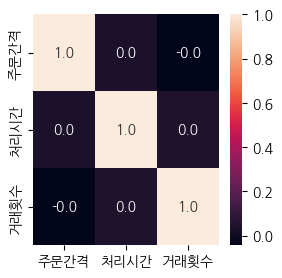

In [29]:
df2 = df1[:]
df2['주문간격'] = df2['주문간격'].dt.total_seconds()
df2['처리시간'] = df2['처리시간'].dt.total_seconds()

plt.figure(figsize=(3, 3))
sns.heatmap(df2[df2['사입처리사입자']=='E230'].corr(), fmt='.1f', annot=True)
# df2['주문간격'].corr(df2['처리시간'])

#### 이탈 사입자

In [30]:
df_E106 = df1[df1['사입처리사입자']=='E106']
df_E106.describe()

,주문간격,처리시간,거래횟수
count,58,59,59.000000
mean,5 days 07:55:27.931034482,1 days 02:03:52.881355932,30.000000
std,14 days 05:41:22.905920470,0 days 22:05:39.445842945,17.175564
min,0 days 00:00:00,0 days 00:02:00,1.000000
25%,0 days 00:53:00,0 days 09:07:00,15.500000
50%,0 days 22:24:00,0 days 23:30:00,30.000000
75%,4 days 06:09:45,1 days 00:09:00,44.500000
max,77 days 00:01:00,2 days 23:57:00,59.000000


In [31]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_E106['주문일시'], y=df_E106['거래횟수'],
                         name='거래횟수'))
fig.add_trace(go.Scatter(x=df_E106['주문일시'], y=df_E106['처리시간'],
                         mode='markers', name='처리시간', yaxis='y2'))

fig.update_layout(title='E106의 거래횟수 및 처리시간',
                  xaxis_title='주문일시',
                  yaxis=dict(title='거래횟수'),
                  yaxis2=dict(title='처리시간', tickformat='',
                              overlaying='y', side='right'))

<ipython-input-32-2cdd410e80b4>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

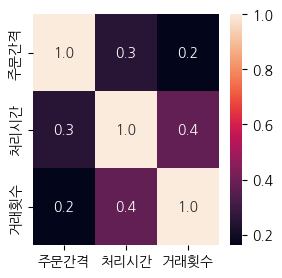

In [32]:
plt.figure(figsize=(3, 3))
sns.heatmap(df2[df2['사입처리사입자']=='E106'].corr(), fmt='.1f', annot=True)

- 마지막 5건의 주문 간격의 패턴

In [33]:
df1[df1['사입처리사입자']=='E230'].tail(5)['주문간격']

812    0 days 00:01:00
2566   0 days 00:15:00
2601   0 days 00:28:00
1159   0 days 01:01:00
3655   0 days 01:36:00
Name: 주문간격, dtype: timedelta64[ns]

In [34]:
df1[df1['사입처리사입자']=='E106'].tail(5)['주문간격']

45   6 days 22:37:00
44   0 days 01:04:00
24   7 days 21:07:00
59   1 days 04:30:00
52   6 days 00:51:00
Name: 주문간격, dtype: timedelta64[ns]

### 외상 거래 처리 시간과 고객 이탈 여부 간의 상관 관계

<ipython-input-35-977eb55fdff4>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-35-977eb55fdff4>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



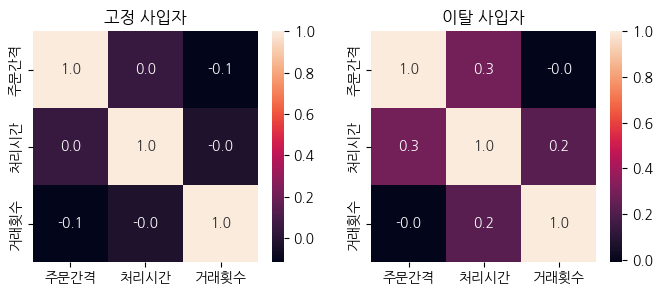

In [35]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.title('고정 사입자')
sns.heatmap(df2[df2['이탈여부']=='N'].corr(), fmt='.1f', annot=True)

plt.subplot(1, 2, 2)
plt.title('이탈 사입자')
sns.heatmap(df2[df2['이탈여부']=='Y'].corr(), fmt='.1f', annot=True)

plt.show()

### 외상 거래 처리 시간의 분포

In [36]:
# 외상 거래 처리 시간의 분포
px.histogram(df1, x='처리시간_그룹', color='이탈여부')

In [37]:
px.histogram(df1, x='주문간격_그룹', color='이탈여부')

In [38]:
px.scatter(df1, x='주문일시', y='처리시간', color='이탈여부',
           size="거래횟수", size_max=70)

In [39]:
px.scatter(df1, x="처리시간", y="주문간격", color="이탈여부",
           marginal_x="box", marginal_y="violin")

array([[<Axes: title={'center': '주문일시'}>,
        <Axes: title={'center': '주문간격'}>],
       [<Axes: title={'center': '처리일시'}>,
        <Axes: title={'center': '외상납입일'}>],
       [<Axes: title={'center': '처리시간'}>,
        <Axes: title={'center': '거래횟수'}>]], dtype=object)

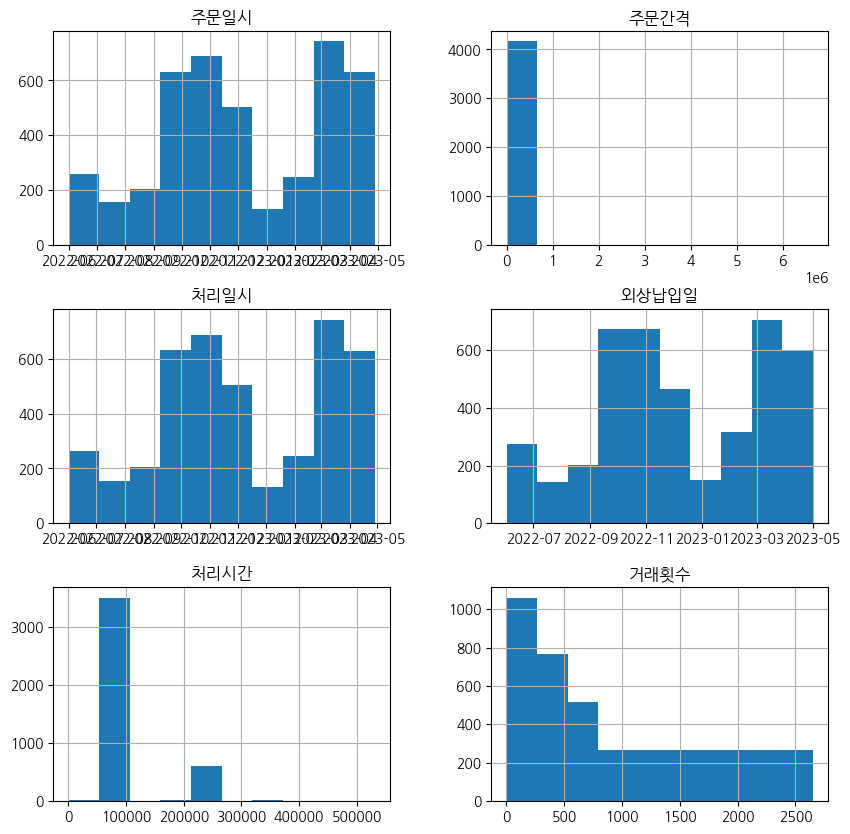

In [40]:
df2.hist(figsize=(10, 10))